In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

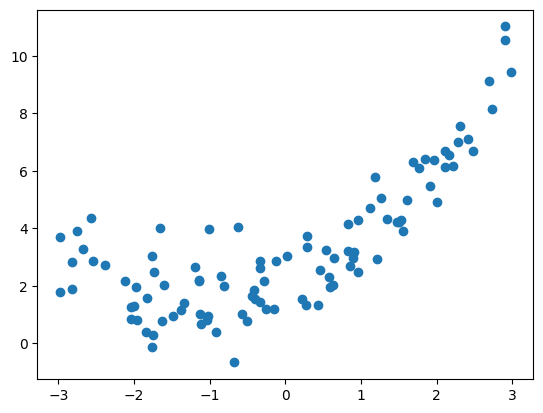

In [5]:
# Creating the dataset
X = 6 * np.random.rand(100, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(100, 1)
# quadratic equation is y = 0.5X^2 + X + 2 + outliers
plt.scatter(X, y)

In [21]:
from sklearn.model_selection import train_test_split
Xtrain, xt, Ytrain, yt = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
#Using simple linear regression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

In [23]:
lin_reg.fit(Xtrain, Ytrain) 
# there is no standard scaler here because the data is already scaled as data is small valued

LinearRegression()

In [24]:
from sklearn.metrics import r2_score
score = r2_score(yt, lin_reg.predict(xt))
print("R2 Score: ", score)

R2 Score:  0.3971368184690234


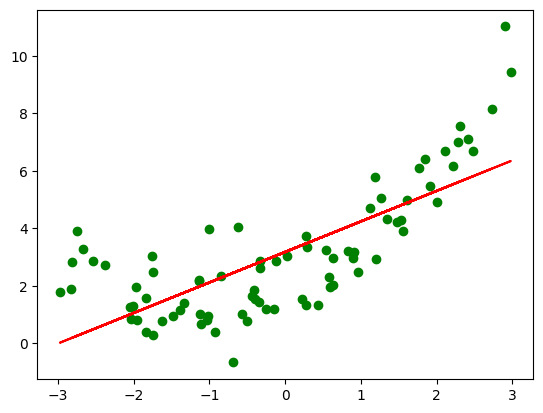

In [25]:
# Visualising the Linear Regression results
plt.plot(Xtrain, lin_reg.predict(Xtrain), color = 'red')
plt.scatter(Xtrain, Ytrain, color='green')


In [26]:
# Applying Polynomial Regression
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree=2, include_bias=True)
# degree=2 means we are adding X^2 to the dataset and include_bias=True means we are adding 1 to the dataset
# so the dataset will be X^0, X^1, X^2
# X^0 is 1
X_poly = poly.fit_transform(Xtrain)
xt_poly = poly.transform(xt)

In [ ]:
X_poly
# Output is X^0, X^1, X^2
# Similarly, xt_poly will be X^0, X^1, X^2

In [29]:
reg = LinearRegression()
reg.fit(X_poly, Ytrain)
ypred = reg.predict(xt_poly)
score1 = r2_score(yt, ypred)
print("R2 Score: ", score1)

R2 Score:  0.8217382276546251


In [30]:
print(reg.coef_)

[[0.         1.09412518 0.47706247]]


In [31]:
print(lin_reg.coef_)

[[1.06210666]]


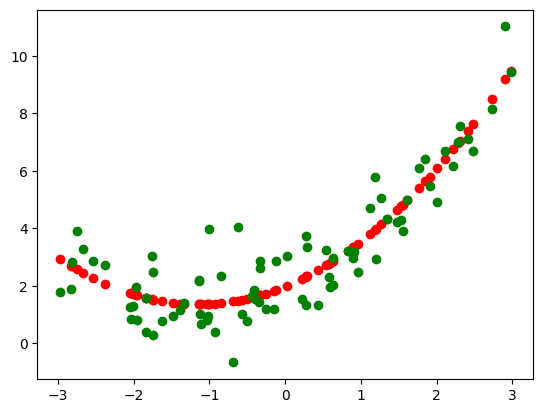

In [32]:
plt.scatter(Xtrain, reg.predict(X_poly), color='red')
plt.scatter(Xtrain, Ytrain, color='green')

In [34]:
# Making the degree 3
poly=PolynomialFeatures(degree=3,include_bias=True)
X_train_poly=poly.fit_transform(Xtrain)
X_test_poly=poly.transform(xt)

In [35]:
from sklearn.metrics import r2_score
regression = LinearRegression()
regression.fit(X_train_poly, Ytrain)
y_pred = regression.predict(X_test_poly)
score=r2_score(yt,y_pred)
print(score)

0.823613590229908


In [37]:
#3 Prediction of new data set
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)

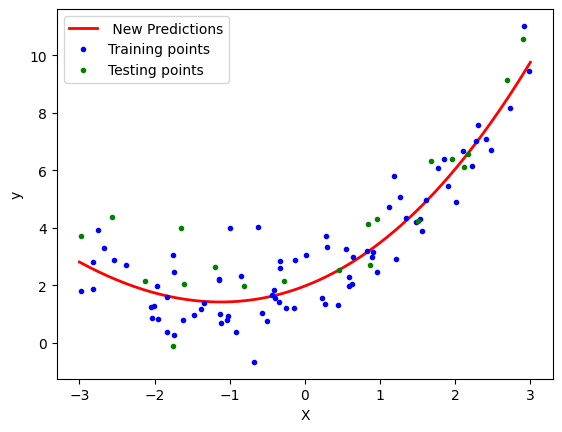

In [38]:
y_new = regression.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label=" New Predictions")
plt.plot(Xtrain, Ytrain, "b.",label='Training points')
plt.plot(xt, yt, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

## Pipeline Concepts

In [39]:
from sklearn.pipeline import Pipeline

In [ ]:
def poly_regression(degree):
    X_new = np.linspace(-3, 3, 200).reshape(200, 1)
    
    poly_features=PolynomialFeatures(degree=degree,include_bias=True)
    lin_reg=LinearRegression()
    poly_regression=Pipeline([
        ("poly_features",poly_features),
        ("lin_reg",lin_reg)
    ])
    poly_regression.fit(Xtrain,Ytrain) ## polynomial and fit of linear regression
    y_pred_new=poly_regression.predict(X_new)
    #plotting prediction line
    plt.plot(X_new, y_pred_new,'r', label="Degree " + str(degree), linewidth=2)
    plt.plot(Xtrain,Ytrain, "b.", linewidth=3)
    plt.plot(xt, yt, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-4,4, 0, 10])
    plt.show()


# Polynomial Regression Function

The `poly_regression` function performs polynomial regression on a given dataset and visualizes the results. It allows users to observe how different polynomial degrees affect the model's fit to the data. Below is a detailed breakdown of each parameter and its role in the function.

---

## Parameters and Their Roles

### `degree`
- **Type**: Integer
- **Description**: Defines the degree of the polynomial used in the regression model. A higher degree results in a more complex model, capable of fitting intricate patterns in the data.

### `X_new`
- **Type**: NumPy array
- **Description**: Contains 200 evenly spaced values between -3 and 3, reshaped as a column vector. These values serve as new inputs to generate predictions, allowing for a smooth polynomial regression line on the plot.

### `poly_features`
- **Type**: `PolynomialFeatures` object from `sklearn.preprocessing`
- **Parameters**:
  - `degree`: The degree of the polynomial transformation.
  - `include_bias`: Adds a bias term (intercept) if `True`.
- **Description**: Transforms the input data into polynomial features of the specified degree. This enables the linear regression model to capture non-linear relationships.

### `lin_reg`
- **Type**: `LinearRegression` object from `sklearn.linear_model`
- **Description**: The core linear regression model that will be trained on the polynomial features created by `poly_features`.

### `poly_regression`
- **Type**: `Pipeline` object from `sklearn.pipeline`
- **Parameters**:
  - A sequence of tuples, where each tuple contains a name and a transformer/estimator.
    - `("poly_features", poly_features)`: Applies the polynomial feature transformation.
    - `("lin_reg", lin_reg)`: Fits the linear regression model on the transformed data.
- **Description**: Executes a step-by-step application of polynomial transformation and linear regression fitting, streamlining the regression process.

### `Xtrain` and `Ytrain`
- **Type**: NumPy arrays (assumed predefined elsewhere in the code)
- **Description**: Training data used to fit the polynomial regression model. `Xtrain` represents input features, and `Ytrain` represents target values.

### `y_pred_new`
- **Type**: NumPy array
- **Description**: Predicted output values for `X_new`, generated using the fitted polynomial regression model. These values are used to plot the polynomial regression line.

---

## Visualization Components

### `plt.plot`
- **Parameters**:
  - `X_new`, `y_pred_new`: Plots the polynomial regression predictions (in red), labeled according to the polynomial degree.
  - `Xtrain`, `Ytrain`: Plots the original training data (in blue) for reference.
  - `xt`, `yt`: Additional data points (in green) for visual comparison (assumed to be predefined).
- **Description**: Plots both the fitted polynomial regression line and the original data points, allowing for a clear comparison between the model's predictions and actual data.

### `plt.legend`
- **Parameters**:
  - `loc="upper left"`: Positions the legend in the upper-left corner of the plot.
- **Description**: Adds a legend that distinguishes between the polynomial regression line and original data points.

### `plt.xlabel` and `plt.ylabel`
- **Parameters**:
  - `X`: Sets the label for the x-axis.
  - `Y`: Sets the label for the y-axis.
- **Description**: Labels the axes to enhance readability and clarity of the plot.

### `plt.axis`
- **Parameters**:
  - `[-4, 4, 0, 10]`: Sets the x-axis range from -4 to 4 and the y-axis range from 0 to 10.
- **Description**: Defines the axis limits to ensure all relevant data points and the regression line fit within the plot view.

### `plt.show()`
- **Description**: Displays the final plot, allowing users to visualize the polynomial regression model alongside the original data.

---

## Usage Example
The `poly_regression` function is ideal for visualizing how polynomial regression fits a dataset and analyzing the impact of polynomial degree on the model's ability to capture data trends.
